# Social Network Analysis - Class 3 - Ego networks

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import QMSS as qmss

### Question 1a: Do people from different parts of the country have larger or smaller ego networks? 

Because of the large size of the file, we will only import variables that we need for the analysis instead of the entire dataframe at once:

In [45]:
df = pd.read_csv('Data/gss-nets.csv', 
                 usecols=['year', 'numgiven', 'region', 'born', 'year', 'age', 'educ', 'sex', 'realinc', 'race', 'attend'])

In [14]:
df.numgiven.value_counts().sort_index()

0     759
1    1062
2    1129
3    1651
4     599
5     544
6     285
Name: numgiven, dtype: int64

To return the relative frequencies of each unique value, set `normalize=True` in the function arguments

In [15]:
df.numgiven.value_counts(normalize=True).sort_index()

0    0.125892
1    0.176149
2    0.187262
3    0.273843
4    0.099353
5    0.090231
6    0.047272
Name: numgiven, dtype: float64

In [46]:
# slide 15
df['reg'] = df.region.map({1: 'north', 2: 'north',
                           3: 'midwest', 4: 'midwest', 
                           5: 'south', 6: 'south', 7: 'south', 
                           8: 'west', 9: 'west'})

Text(0,0.5,'numgiven')

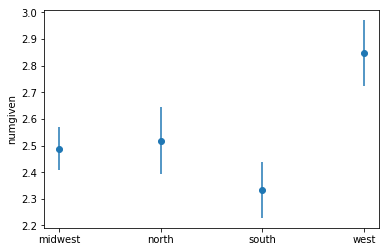

In [51]:
# slide 14, 15
lm_numgiven = smf.ols('numgiven ~ C(reg)', data=df).fit()

numgiven_mean = df.groupby('reg')['numgiven'].mean()
numgiven_bse = lm_numgiven.bse

plt.errorbar(x=numgiven_mean.index, y=numgiven_mean, yerr=1.96*numgiven_bse, marker='o', linestyle='')
plt.ylabel('numgiven')

### Question 1b: Do immigrants have smaller ego networks than native-born US citizens?

Text(0,0.5,'numgiven')

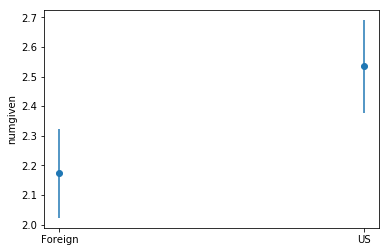

In [54]:
# slide 19
df['native'] = df.born.map({1: 'US', 2:'Foreign'})

lm_native = smf.ols('numgiven ~ native', data=df).fit()

native_mean = df.groupby('native')['numgiven'].mean()
native_bse = lm_native.bse

plt.errorbar(x=native_mean.index, y=native_mean, yerr=1.96*native_bse, marker='o', linestyle='')
plt.ylabel('numgiven')

### Question 1c: Are people's ego networks shrinking over time?

Text(0,0.5,'numgiven')

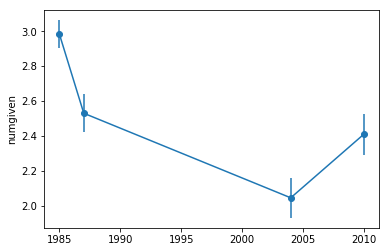

In [85]:
# slide 22
lm_year = smf.ols('numgiven ~ C(year)', data=df).fit()

year_mean = df.groupby('year')['numgiven'].mean()
year_bse = lm_year.bse

plt.errorbar(x=year_mean.index, y=year_mean, yerr=1.96*year_bse, marker='o', linestyle='-')
plt.ylabel('numgiven')

## Multivariate analyses

In [89]:
# slide 27

df['realinc10k'] = df.realinc/10000

lm1 = smf.ols('numgiven ~ reg + native + C(year) + age + educ + sex + realinc10k + C(race) + attend', data=df).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               numgiven   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     63.86
Date:                Fri, 24 Aug 2018   Prob (F-statistic):          8.28e-168
Time:                        11:32:24   Log-Likelihood:                -9952.2
No. Observations:                5453   AIC:                         1.993e+04
Df Residuals:                    5438   BIC:                         2.003e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.1928      0.164      7.290      0.000       0.872       1.514
reg[T.north]       -0.0099      0.064     -0.155      0.876      -0.135       0.115
reg[T.south]       -0.0628      0.052     -1.196      0.232      -0.166       0.040
reg[T.west]         0.2679      0.062      4.323      0.000       0.146       0.389
native[T.US]        0.2065      0.083      2.497      0.013       0.044       0.369
C(year)[T.1987]    -0.3790      0.056     -6.813      0.000      -0.488      -0.270
C(year)[T.2004]    -1.0509      0.060    -17.659      0.000      -1.168      -0.934
C(year)[T.2010]    -0.6469      0.062    -10.459      0.000      -0.768      -0.526
C(race)[T.2]       -0.4570      0.058     -7.931      0.000      -0.570      -0.344
C(race)[T.3]       -0.4369      0.106     -4.137      0.000      -0.644      -0.230
age                -0.0041      0.001     -3.211      0.001      -0.007      -0.002
educ                0.1010      0.007     13.534      0.000       0.086       0.116
sex                 0.2146      0.042      5.159      0.000       0.133       0.296
realinc10k          0.0475      0.008      6.205      0.000       0.032       0.063
attend              0.0374      0.008      4.702      0.000       0.022       0.053
==============================================================================
Omnibus:                       95.442   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.324
Skew:                           0.273   Prob(JB):                     4.01e-20
Kurtosis:                       2.693   Cond. No.                         435.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<br>
Since our dependent variable is count, it's probably better to fit a Poisson model

In [90]:
# slide 38
from statsmodels.discrete.discrete_model import Poisson

poisson1 = Poisson.from_formula('numgiven ~ reg + native + C(year) + age + educ + sex + realinc10k + \
                                 C(race) + attend', data=df).fit()
poisson1.summary()

Optimization terminated successfully.
         Current function value: 1.808855
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:               numgiven   No. Observations:                 5453
Model:                        Poisson   Df Residuals:                     5438
Method:                           MLE   Df Model:                           14
Date:                Fri, 24 Aug 2018   Pseudo R-squ.:                 0.03862
Time:                        11:37:22   Log-Likelihood:                -9863.7
converged:                       True   LL-Null:                       -10260.
                                        LLR p-value:                4.517e-160
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.3557      0.070      5.085      0.000       0.219       0.493
reg[T.north]       -0.0062      0.026     -0.236      0.814      -0.058       0.045
reg[T.south]       -0.0284      0.022     -1.289      0.197      -0.072       0.015
reg[T.west]         0.0943      0.025      3.800      0.000       0.046       0.143
native[T.US]        0.0878      0.036      2.426      0.015       0.017       0.159
C(year)[T.1987]    -0.1311      0.022     -5.955      0.000      -0.174      -0.088
C(year)[T.2004]    -0.4081      0.025    -16.280      0.000      -0.457      -0.359
C(year)[T.2010]    -0.2337      0.025     -9.354      0.000      -0.283      -0.185
C(race)[T.2]       -0.1988      0.026     -7.695      0.000      -0.249      -0.148
C(race)[T.3]       -0.1857      0.048     -3.900      0.000      -0.279      -0.092
age                -0.0017      0.001     -3.171      0.002      -0.003      -0.001
educ                0.0408      0.003     12.986      0.000       0.035       0.047
sex                 0.0880      0.017      5.093      0.000       0.054       0.122
realinc10k          0.0169      0.003      5.611      0.000       0.011       0.023
attend              0.0144      0.003      4.382      0.000       0.008       0.021
===================================================================================
"""

### Question 2a: Are the ego networks of religious people more closely-knit?

In [89]:
df2 = pd.read_csv('Data/gss-nets.csv', 
                  usecols=['attend', 'numgiven', 
                           'close12', 'close13', 'close14', 'close15', 'close23', 'close24', 'close25',
                           'close34', 'close35', 'close45', 
                           'born', 'year', 'age', 'educ', 'sex', 'realinc', 'race', 'marital', 'partyid'])

In [90]:
# slide 52
close_cols = ['close12', 'close13', 'close14', 'close15', 'close23', 'close24', 'close25',
              'close34', 'close35', 'close45']

# create 'any' columns
anys = []
for c in close_cols:
    c_num = c[-2:]
    any_col = 'any' + str(c_num)
    anys.append(any_col)
    df2[any_col] = np.where(pd.isnull(df2[c]), np.nan, 
                          np.where(df2[c]<3, 1, 0))

df2['anydensity'] = df2[anys].mean(axis=1)

df2['attend_cat'] = pd.cut(df2.attend, bins=[-1, 2, 5, 8], labels=['infrequent', 'moderate', 'a lot'])

Text(0,0.5,'anydensity')

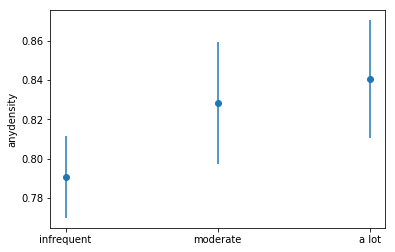

In [141]:
lm_anydensity = smf.ols('anydensity ~ C(attend_cat)', data=df2).fit()

anydensity_mean = df2.groupby('attend_cat')['anydensity'].mean()
anydensity_bse = lm_anydensity.bse

plt.errorbar(x=anydensity_mean.index, y=anydensity_mean, yerr=1.96*anydensity_bse, marker='o', linestyle='')
plt.ylabel('anydensity')

### Question 2b: Are the ego networks of religious people more dense?

In [91]:
# slide 58

strongs = []
for c in close_cols:
    c_num = c[-2:]
    strong_col = 'strong' + str(c_num)
    strongs.append(strong_col)
    df2[strong_col] = np.where(pd.isnull(df2[c]), np.nan, 
                          np.where(df2[c]<2, 1, 0))

df2['strongdensity'] = df2[strongs].mean(axis=1)

In [59]:
# slide 59
df2[['anydensity', 'strongdensity']].describe()

,anydensity,strongdensity
count,1949.000000,1949.000000
mean,0.819050,0.430267
std,0.282262,0.389373
min,0.000000,0.000000
25%,0.666667,0.000000
50%,1.000000,0.333333
75%,1.000000,0.900000
max,1.000000,1.000000


In [133]:
df2[['anydensity', 'strongdensity']].corr()

,anydensity,strongdensity
anydensity,1.000000,0.447199
strongdensity,0.447199,1.000000


Text(0,0.5,'strongdensity')

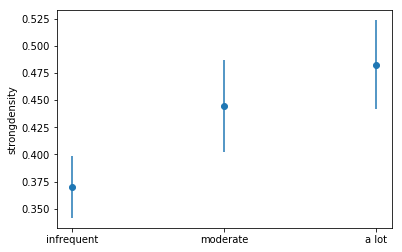

In [128]:
# slide 60
lm_strongdensity = smf.ols('strongdensity ~ C(attend_cat)', data=df2).fit()

strongdensity_mean = df2.groupby('attend_cat')['strongdensity'].mean()
strongdensity_bse = lm_strongdensity.bse

plt.errorbar(x=strongdensity_mean.index, y=strongdensity_mean, yerr=1.96*strongdensity_bse, marker='o', linestyle='')
plt.ylabel('strongdensity')

### Multivariate analyses

In [214]:
# slide 62-63
lm1 = smf.ols('anydensity ~ attend', data=df2).fit()
lm2 = smf.ols('strongdensity ~ attend', data=df2).fit()
lm3 = smf.ols('anydensity ~ attend + numgiven + C(born) + C(year) + age + educ + \
         sex + realinc + C(race) + C(marital)', data=df2).fit()
lm4 = smf.ols('strongdensity ~ attend + numgiven + C(born) + C(year) + age + educ + \
         sex + realinc + C(race) + C(marital)', data=df2).fit()

from statsmodels.iolib.summary2 import summary_col

summary_col([lm1, lm2, lm3, lm4], stars=True)

,anydensity I,strongdensity I,anydensity II,strongdensity II
C(born)[T.2.0],,,-0.0122,0.0025
,,,(0.0260),(0.0355)
C(marital)[T.2.0],,,-0.0111,-0.0454
,,,(0.0297),(0.0405)
C(marital)[T.3.0],,,-0.1039***,-0.0908***
,,,(0.0208),(0.0283)
C(marital)[T.4.0],,,-0.1659***,-0.0947**
,,,(0.0352),(0.0480)
C(marital)[T.5.0],,,-0.0591***,-0.0442*
,,,(0.0189),(0.0257)


In [92]:
# slide 65-67
## Discretizing variables

df2['d_anydensity'] = pd.cut(df2.anydensity, bins=10, labels=False)
df2['d_strongdensity'] = pd.cut(df2.strongdensity, bins=10, labels=False)

In [184]:
df2[['d_anydensity', 'd_strongdensity']].apply(pd.Series.value_counts)

,d_anydensity,d_strongdensity
0.0,103,611
1.0,10,186
2.0,19,70
3.0,113,286
4.0,66,104
5.0,57,51
6.0,214,115
7.0,60,17
8.0,133,31
9.0,1174,478


As of the time of this writing, there is no Python module that fits ordered logit models. Therefore, we will rely on the `MASS` package in R to produce results

In [62]:
from rpy2.robjects.packages import importr

MASS = importr('MASS')

%load_ext rpy2.ipython

In [93]:
# Remove NA's 
df2_noNA = df2[df2.d_anydensity.notna()]

In [94]:
%%R -i df2_noNA

summary(polr(as.factor(d_anydensity) ~ attend, data=df2_noNA))

/Users/melindasong/anaconda/envs/py36/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Error in as.character.factor(x) : malformed factor

  warnings.warn(x, RRuntimeWarning)
/Users/melindasong/anaconda/envs/py36/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "attend_cat". Fall back to string conversion. The error is: Error in as.character.factor(x) : malformed factor

  (name, str(e)))
/Users/melindasong/anaconda/envs/py36/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)
/Users/melindasong/anaconda/envs/py36/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 
Re-fitting to get Hessian


  warnings.warn(x, RRuntimeWarning)


Call:
polr(formula = as.factor(d_anydensity) ~ attend, data = df2_noNA)

Coefficients:
         Value Std. Error t value
attend 0.03596    0.01661   2.165

Intercepts:
    Value    Std. Error t value 
0|1  -2.7453   0.1192   -23.0350
1|2  -2.6469   0.1156   -22.9064
2|3  -2.4811   0.1100   -22.5595
3|4  -1.7974   0.0933   -19.2718
4|5  -1.5188   0.0888   -17.1019
5|6  -1.3148   0.0862   -15.2600
6|7  -0.7144   0.0812    -8.7946
7|8  -0.5705   0.0806    -7.0749
8|9  -0.2734   0.0798    -3.4273

Residual Deviance: 5631.168 
AIC: 5651.168 
(5 observations deleted due to missingness)


In [73]:
%%R -i df2_noNA

summary(polr(as.factor(d_strongdensity) ~ attend, data=df2_noNA, method='logistic'))

/Users/melindasong/anaconda/envs/py36/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "attend_cat". Fall back to string conversion. The error is: Error in as.character.factor(x) : malformed factor

  (name, str(e)))


Call:
polr(formula = as.factor(d_strongdensity) ~ attend, data = df2_noNA, 
    method = "logistic")

Coefficients:
         Value Std. Error t value
attend 0.07425    0.01513   4.908

Intercepts:
    Value   Std. Error t value
0|1 -0.4981  0.0761    -6.5483
1|2 -0.0787  0.0753    -1.0455
2|3  0.0704  0.0753     0.9354
3|4  0.6685  0.0770     8.6866
4|5  0.8976  0.0782    11.4827
5|6  1.0151  0.0789    12.8657
6|7  1.2994  0.0810    16.0367
7|8  1.3445  0.0814    16.5125
8|9  1.4292  0.0822    17.3864

Residual Deviance: 7208.398 
AIC: 7228.398 
(5 observations deleted due to missingness)


### Question 3a: Are the ego networks of strongly political people more intense than those of less political people?

In [111]:
# slide 77
## create reverse close columns
reverse_cols = []
for c in close_cols:
    reverse_col = 'r_' + c
    reverse_cols.append(reverse_col)
    df2[reverse_col] = qmss.reverse_this(df2[c])

# calculate 'intensity' by taking the row mean
df2['intensity'] = df2[reverse_cols].mean(axis=1)

In [114]:
# slide 80
lm1 = smf.ols('intensity ~ partyid + numgiven', data=df2[df2.partyid<7]).fit()
lm2 = smf.ols('intensity ~ partyid + I(partyid**2) + numgiven', data=df2[df2.partyid<7]).fit()
lm3 = smf.ols('intensity ~ partyid + I(partyid**2) + numgiven + age + educ + C(marital) + sex', data=df2[df2.partyid<7]).fit()

summary_col([lm1, lm2, lm3], stars=True)

,intensity I,intensity II,intensity III
C(marital)[T.2.0],,,-0.0672
,,,(0.0562)
C(marital)[T.3.0],,,-0.1888***
,,,(0.0401)
C(marital)[T.4.0],,,-0.2744***
,,,(0.0704)
C(marital)[T.5.0],,,-0.0862**
,,,(0.0362)
I(partyid ** 2),,0.0115***,0.0094**
,,(0.0039),(0.0039)


In [226]:
lm3_dat = df2[['partyid']].copy()
lm3_dat['fitted'] = lm3.fittedvalues

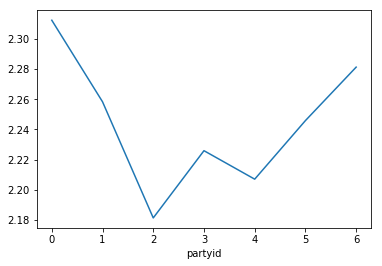

In [232]:
lm3_dat.groupby('partyid')['fitted'].mean().plot()

## How to make ego networks

In [2]:
pd.set_option('display.max_columns', 50)

In [3]:
# get the network data
x = pd.read_table('http://moreno.ss.uci.edu/acct.dat', delim_whitespace=True, skiprows=10, 
                         nrows=24, names=list(np.arange(1, 25)))
x.index = list(np.arange(1, 25))

# get the attribute data
y = pd.read_table('http://moreno.ss.uci.edu/acc_att.dat', skiprows=8, delim_whitespace=True, names=['sex', 'job'])
y.index = list(np.arange(1, 25))

In [4]:
x

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,2,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,3,2,2,2,2,1,0,2,2,1,2,1,2,0,2,2,1,0,0,0,0
5,0,0,0,2,10,5,9,5,2,0,5,5,4,5,4,4,0,4,5,0,1,0,0,0
6,0,0,0,2,5,8,7,2,1,0,2,2,1,2,2,2,0,2,2,0,0,0,0,0
7,0,0,1,2,9,7,13,5,2,0,6,4,3,4,3,3,0,4,5,0,1,0,0,0
8,0,0,0,2,5,2,5,7,4,1,4,4,3,4,3,5,0,4,5,0,1,0,0,0
9,0,0,0,1,2,1,2,4,9,6,4,2,2,2,2,6,0,2,2,0,0,0,0,0
10,0,0,0,0,0,0,0,1,6,7,2,0,0,0,0,4,0,0,0,0,0,0,0,0


In [5]:
y.head(10)

,sex,job
1,1,1
2,1,1
3,1,1
4,2,3
5,2,3
6,1,2
7,1,2
8,2,3
9,1,3
10,1,3


Python also has its implementation of `igraph`. However, the implementation is not entirely the same as in R. Therefore, some of the results produced are different. 

For example, when making the graph from the adjacency matrix, Python assumes that the non-zero elements are indicator variables for there being a connection between two people when calculating degrees. As can be seen in the results below, the degree values outputted are smaller than those calculated in R. 

In [58]:
import igraph

# graph building function only takes in lists
A = (x.values).tolist()

xmg = igraph.Graph.Adjacency(A)

xmg.vs['label'] = x.index

# default graph built by igraph is directed, we convert it to undirected
xmg.to_undirected()

In [59]:
y['degree']=xmg.degree()
y.head(10)

,sex,job,degree
1,1,1,4
2,1,1,0
3,1,1,6
4,2,3,16
5,2,3,16
6,1,2,15
7,1,2,17
8,2,3,17
9,1,3,16
10,1,3,6


In [55]:
# slide 105
lm1 = smf.ols('degree ~ C(sex) + C(job)', data=y).fit()
lm1.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 degree   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     1.250
Date:                Mon, 07 Jan 2019   Prob (F-statistic):              0.324
Time:                        23:27:03   Log-Likelihood:                -71.694
No. Observations:                  24   AIC:                             153.4
Df Residuals:                      19   BIC:                             159.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      10.0000      2.202      4.542      0.000       5.392      14.608
C(sex)[T.2]     2.6154      3.173      0.824      0.420      -4.026       9.257
C(job)[T.2]     4.7949      3.957      1.212      0.241      -3.488      13.078
C(job)[T.3]     3.2821      3.173      1.034      0.314      -3.359       9.923
C(job)[T.4]    -2.1154      4.446     -0.476      0.640     -11.420       7.189
==============================================================================
Omnibus:                        0.065   Durbin-Watson:                   1.442
Prob(Omnibus):                  0.968   Jarque-Bera (JB):                0.206
Skew:                          -0.106   Prob(JB):                        0.902
Kurtosis:                       2.599   Cond. No.                         6.91
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(array([ 1.,  1.,  1.,  2.,  3.,  2.,  0.,  2., 10.,  2.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <a list of 10 Patch objects>)

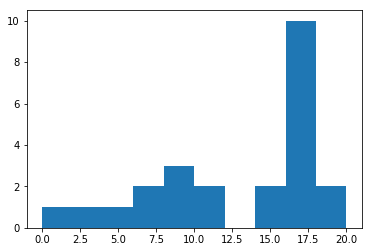

In [60]:
# slide 106
plt.hist(y.degree)

In [63]:
# log degree
y['ln_degree'] = np.log(y.degree)

# remove -inf value
y = y.replace(-np.inf, np.nan)
y = y.dropna()

In [65]:
lm3 = smf.ols('ln_degree ~ C(sex) + C(job)', data=y).fit()
lm3.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ln_degree   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.045
Date:                Mon, 07 Jan 2019   Prob (F-statistic):              0.412
Time:                        23:51:55   Log-Likelihood:                -14.493
No. Observations:                  23   AIC:                             38.99
Df Residuals:                      18   BIC:                             44.66
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.3227      0.230     10.112      0.000       1.840       2.805
C(sex)[T.2]     0.2390      0.302      0.791      0.439      -0.396       0.874
C(job)[T.2]     0.3474      0.388      0.894      0.383      -0.469       1.163
C(job)[T.3]     0.1910      0.316      0.604      0.554      -0.474       0.856
C(job)[T.4]    -0.3476      0.434     -0.802      0.433      -1.259       0.564
==============================================================================
Omnibus:                        4.455   Durbin-Watson:                   1.360
Prob(Omnibus):                  0.108   Jarque-Bera (JB):                2.911
Skew:                          -0.856   Prob(JB):                        0.233
Kurtosis:                       3.326   Cond. No.                         7.13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""